# Coincidence, probability and randomness

By [Allison Parrish](http://www.decontextualize.com/)

This is a [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) with my notes on randomness, probability, and the sensation of "coincidence." The notebook has written notes and Python code that you can execute. (You don't need to be able to read or write Python code to follow along with the notebook.)

These notes are still a work in progress! I originally wrote these notes to go along with an in-class presentation, and they're not quite "freestanding" at this point.

## Randomness and coincidence in design

From [Does your iPod play favorites?](https://www.newsweek.com/does-your-ipod-play-favorites-116739):

![ipod shuffle](https://upload.wikimedia.org/wikipedia/commons/1/15/Ipod-shuffle-usb-connector.jpg)

> Last spring it dawned on Apple CEO Steve Jobs that the heart of his hit iPod digital music player was the "shuffle." [...] [Jobs] used the idea as the design principle of the new low-cost iPod Shuffle. Its ad slogan celebrates the serendipity music lovers embrace when their songs are reordered by chance--"Life is random." [...] But just about everyone who has an iPod has wondered how random the iPod shuffle function really is. [...] More than a year ago, I outlined these concerns to Jobs; he dialed up **an engineer who insisted that shuffle played no favorites.** Since then, however, millions of new Podders have started shuffling, and the question has been discussed in newspapers, blogs and countless conversations. It's taking on Oliver Stone-like conspiracy buzz. [...] Apple execs profess amusement. "It's part of the magic of shuffle," says Greg Joswiak, the VP for iPod products. Still, I asked him last week to double-check with the engineers. They flatly assured him that **"Random is random,"** and the algorithm that does the shuffling has been tested and reverified.

Compare with e.g. [Divination: Shufflemancy](https://wolfofantimonyoccultism.com/2017/07/11/shufflemancy/):

> Shufflemancy is a type of divination that works by receiving messages in the forms of songs in a playlist. In this form of divination the practitioner will ask a question, or for guidance, and then activate shuffle in a playlist of some type. This playlist will then begin to play a song and from the song the practitioner will get a message....

From [Sid Meier and Rob Pardo on Probability and Player Psychology](https://www.shacknews.com/article/62807/sid-meier-and-rob-pardo):

![Civilization Revolution](https://upload.wikimedia.org/wikipedia/en/3/32/Civilization_Revolution_Game_Cover.png)

> When designing the combat system in Civilization: Revolution, Sid Meier found himself up against some interesting design problems. [...] In Civ Rev, the strength of units were displayed up front to players before battle to show the odds of victory. For example, an attacking unit might be rated at 1.5 with the defending unit at 0.5. This is a 3-to-1 situation. [...] [T]he testers **expected to win this battle every time despite there being a 25% chance of losing** each time. [...] When the player was presented with 3-to-1 or 4-to-1 odds, they expect to win. With 2-to-1 odds, the player will accept losing some of the time, but expect to win at 20-to-10, which is just a larger expression of 2-to-1. When the numbers get larger, the perceived advantage grows.

> To adjust for this, Sid actually changed the math again so that the **outcomes of previous battles are taken into account.** He found that if a player lost too many 2-to-1 battles in a row, they would get frustrated. Instead of risking a player shutting the game down, Sid changed the math.

![World of Warcraft](https://upload.wikimedia.org/wikipedia/en/9/91/WoW_Box_Art1.jpg)

> [Blizzard Designer] Rob Pardo discussed ... the perception of bonuses versus punishments. [...] [P]layers would get into cold streaks where they went a long time without getting a quest item drop. **Instead of correctly attributing this to randomness, they would blame the math or random number generator.** To get around this, Rob and his team actually changed the code to increase the drop rate after each kill until it hits 100% and then reset it for the next one.

> It's interesting that players don't want to accept math when it doesn't work out for them, but are more than happy to accept it when it rewards them. Purists might dislike Sid Meier changing the match to appease players, but the game became more fun. Blizzard opts to package systems as a reward over penalties and takes a little randomness out of the equation.

## Demonstrating principles of probability with Tarot

Below, I use Tarot in order to demonstrate some elementary principles of probability—and use elementary principles of probability in order to talk about Tarot. I'm especially concerned with the idea of *coincidence* in Tarot. Often in my own Tarot practice, I see patterns emerge—certain cards that come up over and over, for example, or certain suits that seem to be overrepresented—and attribute meaning to those patterns. My hope is that in understanding the nature of how likely these patterns are, I can be better at assigning them meaning.

> Terminology note: In the text below, I refer to a sequence of cards drawn from a Tarot deck as a "spread." This is just a convenience—spreads are, of course, more complicated than that, and their meaning derives not just from the sequence of cards but also from their spatial relationships between each other, etc.

### Loading the data

In [110]:
from tqdm.notebook import tqdm
import json

Here I'm loading in [a JSON file with names and interpretations for the 78 cards in a typical Tarot deck](https://github.com/dariusk/corpora/blob/master/data/divination/tarot_interpretations.json).

In [111]:
cards_raw = json.load(open("tarot_interpretations.json"))['tarot_interpretations']

The code below makes a list of every card in the deck. Each item in the list is a dictionary that contains the name, rank, and suit of the card in question. If you're not familiar with Python programming, you can think of this as essentially a spreadsheet with 78 rows (one for each card) and three columns (name, rank, suit). Most of the code in the rest of the notebook is going to be selecting rows from this spreadsheet at random.

In [112]:
cards = [{k: item[k] for k in ['name', 'rank', 'suit']} for item in cards_raw]

In [113]:
cards

[{'name': 'The Fool', 'rank': 0, 'suit': 'major'},
 {'name': 'The Magician', 'rank': 1, 'suit': 'major'},
 {'name': 'The Papess/High Priestess', 'rank': 2, 'suit': 'major'},
 {'name': 'The Empress', 'rank': 3, 'suit': 'major'},
 {'name': 'The Emperor', 'rank': 4, 'suit': 'major'},
 {'name': 'The Pope/Hierophant', 'rank': 5, 'suit': 'major'},
 {'name': 'The Lovers', 'rank': 6, 'suit': 'major'},
 {'name': 'The Chariot', 'rank': 7, 'suit': 'major'},
 {'name': 'Strength', 'rank': 8, 'suit': 'major'},
 {'name': 'The Hermit', 'rank': 9, 'suit': 'major'},
 {'name': 'The Wheel', 'rank': 10, 'suit': 'major'},
 {'name': 'Justice', 'rank': 11, 'suit': 'major'},
 {'name': 'The Hanged Man', 'rank': 12, 'suit': 'major'},
 {'name': 'Death', 'rank': 13, 'suit': 'major'},
 {'name': 'Temperance', 'rank': 14, 'suit': 'major'},
 {'name': 'The Devil', 'rank': 15, 'suit': 'major'},
 {'name': 'The Tower', 'rank': 16, 'suit': 'major'},
 {'name': 'The Star', 'rank': 17, 'suit': 'major'},
 {'name': 'The Moon', 

The `len()` method tells us how many cards are in the list:

In [114]:
len(cards)

78

Seventy-eight, as you'd expect for a Tarot deck. We're going to use this number a lot, so I'm going to assign its value to a variable `n` that I can reuse below. Whenever you see `n` in the cells below, it's referring back to the number of cards in the deck.

In [115]:
n = len(cards)

### Picking one card at random

Python lets us pick things at random from a list in a few ways. All of them require the `random` module, which we can make available in the notebook like so:

In [116]:
import random

To pick one card, use `random.choice()`:

In [117]:
random.choice(cards)

{'name': 'ten of wands', 'rank': 10, 'suit': 'wands'}

Think of a card in your mind. The probability that the card in a single-card spread will match the card you're thinking of is $\frac{1}{n}$, where `n` is the number of cards in the deck. Here's how to calculate this in Python:

In [118]:
1 / n

0.01282051282051282

In other words, there's a slightly better than 1% chance that the card you're thinking of will be on the top of the deck. (Assuming that the deck has been shuffled fairly, etc.)

To make sure this math is right, I like to run "simulations" in Python. In a simulation, I'm going to perform the task whose probability I want to calculate over and over, then increment a counter whenever the event in question happens. After, I can divide the number of successful trials by the total number of trials in order to get the frequency of successes. The code below does this for our simple one-card spread:

In [119]:
trials = 100000
matches = 0

# do the following 100k times...
for i in tqdm(range(trials)):
    # pick a card
    drawn = random.choice(cards)
    # increment matches if name matches the card we're
    # looking for
    if drawn['name'] == 'The Tower':
        matches += 1

print(matches / trials)


0.01315


When you run this cell, you should see a number that looks more or less similar to the number that we calculated above (~0.0128). As you increase the number of trials, the resulting frequency should theoretically converge on the calculated probability. Try 

> Python syntax notes: Comments begin with `#`. Code blocks are indicated not with curly braces (`{` and `}`) as in JavaScript, C, etc., but with indentation.

The chance of drawing a card that belongs to a particular category can be calculated in a similar way. If `c` is the number of cards in that category, the probability that a single card you draw will belong to that category is $\frac{c}{n}$.

To demonstrate, the code below makes a new list of cards that contains *only* the major arcana:

In [120]:
major_arcana = [item for item in cards if item['suit'] == 'major']

There are this many major arcana:

In [121]:
len(major_arcana)

22

A value I'll assign to the variable `n_major`:

In [122]:
n_major = len(major_arcana)

Performing the calculation below, we can see that any given one-card draw will consist of a major arcana about 28% of the time:

In [123]:
n_major / n

0.28205128205128205

### Picking multiple cards

Python has a function `random.sample()` that lets us pick items at random from a list *without replacement*. "Without replacement" here means that once an item has been picked, it won't be picked subsequently in the same sampling process, so we won't see any duplicate cards. This is a good way of simulating a simple Tarot spread:

In [124]:
random.sample(cards, 3)

[{'name': 'two of coins', 'rank': 2, 'suit': 'coins'},
 {'name': 'six of coins', 'rank': 6, 'suit': 'coins'},
 {'name': 'page of coins', 'rank': 'page', 'suit': 'coins'}]

(Change the number after the comma to pick a different number of cards.)

Now think of *two* Tarot cards. The chance that a two-card spread is calculated as the chance of drawing one of the cards from the full deck (i.e., $\frac{1}{n}$), multiplied by the chance of drawing the other card from a deck that is missing one card (because, in this scenario, the first card is no longer in the deck)—i.e., $\frac{1}{n-1}$. Multiplying across gives us $\frac{1}{n(n-1)}$, which can be expressed in Python like so:

... can be written like so in Python:

In [125]:
1 / (n * (n - 1))

0.0001665001665001665

This tells us that the cards in a two-card draw will match the cards you're thinking of significantly fewer than one in a thousand times. The following cell simulates this scenario, finding how many two-card spreads are The Star followed by the Hierophant:

In [127]:
trials = 100000
target = ['The Star', 'The Pope/Hierophant']
matches = 0
for i in tqdm(range(trials)):
    if [item['name'] for item in random.sample(cards, 2)] == target:
        matches += 1
print(matches/trials)


0.00014


For three cards, the formula would be $\frac{1}{n(n-1)(n-2)}$; for four, $\frac{1}{n(n-1)(n-2)(n-3)}$, and so forth. There's a more general formulation for arbitrary numbers of cards in the spread below.

### Permutations

A Tarot spread is an example a *permutation without repetition*, meaning a set of items drawn at random from a discrete set, where the order in which the items are drawn is important. Python comes with a function called `permutations` that shows all of possible permutations for a given list of things.

In [91]:
from itertools import permutations

To make this demonstration a bit cleaner, I'm going to make a list of all of the card names:

In [128]:
card_names = [item['name'] for item in cards]

There is exactly one permutation of zero cards (i.e., no cards at all):

In [129]:
list(permutations(card_names, 0))

[()]

And there are *n* permutations of one card (i.e., every card is its own single-card spread):

In [130]:
print(list(permutations(card_names, 1)))

[('The Fool',), ('The Magician',), ('The Papess/High Priestess',), ('The Empress',), ('The Emperor',), ('The Pope/Hierophant',), ('The Lovers',), ('The Chariot',), ('Strength',), ('The Hermit',), ('The Wheel',), ('Justice',), ('The Hanged Man',), ('Death',), ('Temperance',), ('The Devil',), ('The Tower',), ('The Star',), ('The Moon',), ('The Sun',), ('Judgement',), ('The World',), ('ace of wands',), ('two of wands',), ('three of wands',), ('four of wands',), ('five of wands',), ('six of wands',), ('seven of wands',), ('eight of wands',), ('nine of wands',), ('ten of wands',), ('page of wands',), ('knight of wands',), ('queen of wands',), ('king of wands',), ('ace of cups',), ('two of cups',), ('three of cups',), ('four of cups',), ('five of cups',), ('six of cups',), ('seven of cups',), ('eight of cups',), ('nine of cups',), ('ten of cups',), ('page of cups',), ('knight of cups',), ('queen of cups',), ('king of cups',), ('ace of swords',), ('two of swords',), ('three of swords',), ('fo

But there are 6006 permutations of *two* cards, of which I show just the first 100 below:

In [131]:
print(list(permutations(card_names, 2))[:100])

[('The Fool', 'The Magician'), ('The Fool', 'The Papess/High Priestess'), ('The Fool', 'The Empress'), ('The Fool', 'The Emperor'), ('The Fool', 'The Pope/Hierophant'), ('The Fool', 'The Lovers'), ('The Fool', 'The Chariot'), ('The Fool', 'Strength'), ('The Fool', 'The Hermit'), ('The Fool', 'The Wheel'), ('The Fool', 'Justice'), ('The Fool', 'The Hanged Man'), ('The Fool', 'Death'), ('The Fool', 'Temperance'), ('The Fool', 'The Devil'), ('The Fool', 'The Tower'), ('The Fool', 'The Star'), ('The Fool', 'The Moon'), ('The Fool', 'The Sun'), ('The Fool', 'Judgement'), ('The Fool', 'The World'), ('The Fool', 'ace of wands'), ('The Fool', 'two of wands'), ('The Fool', 'three of wands'), ('The Fool', 'four of wands'), ('The Fool', 'five of wands'), ('The Fool', 'six of wands'), ('The Fool', 'seven of wands'), ('The Fool', 'eight of wands'), ('The Fool', 'nine of wands'), ('The Fool', 'ten of wands'), ('The Fool', 'page of wands'), ('The Fool', 'knight of wands'), ('The Fool', 'queen of wand

The number 6006 results from multiplying our `n` by `n - 1`:

In [132]:
n * (n - 1)

6006

Here's a chunk of the permutations of three cards:

In [150]:
print(list(permutations(card_names, 3))[:100])

[('The Fool', 'The Magician', 'The Papess/High Priestess'), ('The Fool', 'The Magician', 'The Empress'), ('The Fool', 'The Magician', 'The Emperor'), ('The Fool', 'The Magician', 'The Pope/Hierophant'), ('The Fool', 'The Magician', 'The Lovers'), ('The Fool', 'The Magician', 'The Chariot'), ('The Fool', 'The Magician', 'Strength'), ('The Fool', 'The Magician', 'The Hermit'), ('The Fool', 'The Magician', 'The Wheel'), ('The Fool', 'The Magician', 'Justice'), ('The Fool', 'The Magician', 'The Hanged Man'), ('The Fool', 'The Magician', 'Death'), ('The Fool', 'The Magician', 'Temperance'), ('The Fool', 'The Magician', 'The Devil'), ('The Fool', 'The Magician', 'The Tower'), ('The Fool', 'The Magician', 'The Star'), ('The Fool', 'The Magician', 'The Moon'), ('The Fool', 'The Magician', 'The Sun'), ('The Fool', 'The Magician', 'Judgement'), ('The Fool', 'The Magician', 'The World'), ('The Fool', 'The Magician', 'ace of wands'), ('The Fool', 'The Magician', 'two of wands'), ('The Fool', 'The 

Using the `permutations` function, we can find the total number of permutations for spreads of any size:

In [105]:
for i in range(4):
    print(i, "cards ->", len(list(permutations(cards, i))), "permutations")

0  cards -> 1 permutations
1  cards -> 78 permutations
2  cards -> 6006 permutations
3  cards -> 456456 permutations


Actually "any" size isn't right! The `permutations()` function gives an exhaustive list of all possible permutations, and with 78 cards in the deck, the number of permutations in a spread of five cards is so large that it hangs the CPU on my computer just to generate it. If we're just interested in the number of permutations, we don't have to list them. Instead, we can calculate them with the following formula:

$$\frac{n!}{(n-k)!}$$

The `!` is the *factorial* operator, which evaluates to `n` multiplied by every integer smaller than it down to one (i.e., 4! = 4 × 3 × 2 × 1 = 24). The following code implements a function `npr()` that takes the number of items in the deck and the number to sample at once, and returns the total possible number of permutations:

In [133]:
from math import factorial
def npr(n, r):
    return factorial(n) // factorial(n-r)

Using this, we can see that the number of possible permutations of a Tarot deck increases dramatically as you draw more and more cards:

In [134]:
for i in range(10):
    print(i, "cards ->", npr(n, i), "permutations")

0 cards -> 1 permutations
1 cards -> 78 permutations
2 cards -> 6006 permutations
3 cards -> 456456 permutations
4 cards -> 34234200 permutations
5 cards -> 2533330800 permutations
6 cards -> 184933148400 permutations
7 cards -> 13315186684800 permutations
8 cards -> 945378254620800 permutations
9 cards -> 66176477823456000 permutations


One divided by the number of permutations gives us the probability of any one particular spread. For example the probability of any one particular three-card spread:

In [136]:
1 / npr(n, 3)

2.190791664475875e-06

Or without scientific notation:

In [157]:
print(f'{1/npr(n,3):.10f}')

0.0000021908


This is a really surprising result to me! Three-card spreads to me have such an even texture that it *feels* like they tell me the same thing over and over. But it's unlikely you'll see the exact same three-card spread twice, even if you did half a million of them.

Here's an empirical trial of the formula above. This will take a while, since we have to run several million simulations if we want to have a chance of finding a matching spread:

In [140]:
trials = 2000000
target = ['The Star', 'Temperance', 'The Devil']
matches = 0
for i in tqdm(range(trials)):
    if [c['name'] for c in random.sample(cards, 3)] == target:
        matches +=1
print(matches, "match(es);", matches/trials, "frequency")


5 match(es); 2.5e-06 frequency


There are this many ten-card spreads:

In [154]:
npr(n, 10)

4566176969818464000

That's 4.5 quintillion! In other words, there is *this* probability of drawing any particular sequence of ten Tarot cards:

In [156]:
print(f'{1/npr(n,10):.25f}')

0.0000000000000000002190016


Meaning that any ten card spread is almost certainly unique.

In [79]:
ncr(n, 2) * ncr(n, 2)

9018009

In [47]:
trials = 10000000
target = {'The Star', 'Temperance'}
for i in tqdm(range(trials)):
    if set([c['name'] for c in random.sample(cards, len(target))]) == target and \
        set([c['name'] for c in random.sample(cards, len(target))]) == target:
        print("found!", i)
        break


  4%|▎         | 364636/10000000 [00:02<01:10, 137034.30it/s]

KeyboardInterrupt: 

### Combinations

There are some patterns in Tarot spreads that aren't about the order of the cards. We might, for example, observe that there are an unusual number of cards of a particular suit in a spread, or that major arcana have been showing up with unusual frequency in daily readings over the course of a week. But how do we know if these frequencies are actually unusual?

Let's start with the following question: How likely is it that *every card* in a three-card spread belongs to the suit of cups? The probability that a single card belongs to cups is the number of cards in the suit of cups divided by the number of cards total ($\frac{14}{78}$):

In [161]:
14 / n

0.1794871794871795

(Meaning that about 18% of cards you draw will be cups.)

The probability of drawing *two* cards that are cups is $\frac{14}{78} \times \frac{13}{77}$ (because after having drawn the first card, there are only 13 cups and 77 cards left in the deck):

In [163]:
(14 / n) * (13 / (n - 1))

0.030303030303030304

Following the same pattern, the chance of all cards being cups in a three-card spread is $\frac{14}{78} \times \frac{13}{77} \times \frac{12}{76}$:

In [172]:
(14 / n) * (13 / (n-1)) * (12 / (n-2))

0.004784688995215311

... or around five spreads out of every thousand you draw. The following cell tests this empirically:

In [168]:
trials = 100000
all_cup_count = 0
for i in tqdm(range(trials)):
    # get just the suit for three random cards
    c_suits = [c['suit'] for c in random.sample(cards, 3)]
    # if all are cups, up the count
    if c_suits == ['cups', 'cups', 'cups']:
        all_cup_count += 1
print(all_cup_count / trials)


0.00471


if you do a three-card spread every day, you're likely to get (on average) 1.7 all-cups spreads per year:

In [171]:
(all_cup_count / trials) * 365

1.71915

Another way to state this problem is this: there are a certain number of different ways that three cards can be drawn from a Tarot deck. In how many of those are all of the cards cups? In this case, we don't care about the *order* of the cards, so we're talking about *combinations* (rather than permutations). The formula for calculating the number of combinations of items of a particular size is:

$$\binom{n}{k} = \frac{n!}{k! (n-k)!}$$

The following cell has an implementation of this function in Python, *ncr()* (short for "given *n* items, choose *r*):

In [173]:
import operator as op
from functools import reduce
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

The function tells us how many combinations of two cards there are:

In [190]:
ncr(n, 2)

3003

This is, notably, exactly half of the number of permutations:

In [191]:
npr(n, 2)

6006

... which makes sense. If you aren't worrying about the order of cards, then half of the two-card permutations will be identical to each other.

The number of three-card permutations:

In [193]:
ncr(n, 3)

76076

Each suit in Tarot has 14 cards. The `ncr()` function lets us calculate how many combinations of three cards from a group of fourteen there are:

In [229]:
ncr(14, 3)

364

Dividing the latter by the former gives us the same number that we calculated above for the probability of getting a spread with three cups:

In [230]:
ncr(14, 3) / ncr(n, 3)

0.004784688995215311

The probability of dealing a five-card spread with all major arcana:

In [231]:
ncr(22, 5) / ncr(n, 5)

0.0012474012474012475

An empirical trial of same:

In [240]:
trials = 100000
matches = 0
for i in tqdm(range(trials)):
    c_suits = [c['suit'] for c in random.sample(cards, 5)]
    if c_suits.count('major') == 5:
        matches += 1
print(matches/trials)


0.00122


### Any card in a spread

There are a certain number of three-card spreads:

In [243]:
ncr(n, 3)

76076

If the deck had one fewer card, there would be fewer possible spreads:

In [244]:
ncr(n-1, 3)

73150

So, the probability of any one card being absent from a three-card spread can be calculated by dividing the latter by the former:

In [242]:
ncr(n-1, 3) / ncr(n, 3)

0.9615384615384616

This means that there is a 96% chance that any card you're thinking of will *not* show up in a spread. Subtract this from one to get the probability that the opposite occurs, i.e., the probability that any given card *will* show up in a three-card spread:

In [247]:
1 - (ncr(n-1, 3) / ncr(n, 3))

0.038461538461538436

Let's run a simulation to make sure this is the case. In the following cell, we deal three cards and then check to see if any of them are The Star:

In [252]:
trials = 100000
star_count = 0
for i in tqdm(range(trials)):
    c_names = [c['name'] for c in random.sample(cards, 3)]
    if 'The Star' in c_names:
        star_count += 1
print(star_count / trials)


0.03897


Looks about right! The function below wraps up this expression to make it easy to calculate the chance that a given card will be in a spread of a particular size:

In [25]:
def chance_in_spread(n, r):
    return 1 - (ncr(n-1, r) / ncr(n, r))

Note that as the size of the spread goes up, so do the chances of any given card showing up in the spread:

In [250]:
chance_in_spread(n, 10)

0.1282051282051282

Notably, this means that while there is a relatively low chance for the same card to occur in two subsequent three-card spreads:

In [254]:
chance_in_spread(n, 3) * chance_in_spread(n, 3)

0.0014792899408284004

There's a nearly 2% chance that the same card will show up in a 10-card spread:

In [27]:
chance_in_spread(n, 10) * chance_in_spread(n, 10)

0.016436554898093356

empirical test:

In [255]:
trials = 100000
star_count = 0
for i in tqdm(range(trials)):
    c_names1 = [c['name'] for c in random.sample(cards, 10)]
    c_names2 = [c['name'] for c in random.sample(cards, 10)]
    if 'The Tower' in c_names1 and 'The Tower' in c_names2:
        star_count += 1
print(star_count/trials)


0.0164


## Random distributions

Often when we think of random numbers, we think of rolling a die. Each side has the same probability of coming up. If you rolled a six-sided die a million times, for example, you'd expect the each side to come up roughly the same number of times ($\frac{1000000}{6}$, or about 166667). The following cell performs this experiment, then counts up which sides of the die came up most frequently:

In [266]:
from collections import Counter
rolls = [random.randrange(6)+1 for i in range(1000000)]
Counter(rolls).most_common()

[(2, 167432), (4, 167106), (3, 167002), (6, 166425), (5, 166222), (1, 165813)]

As you can see, even with a million rolls, the numbers don't quite match our estimate, but they're pretty close.

It turns out that this is just one kind of randomness. Other phenomena in the world also produce random outcomes, but they don't always look like the outcomes of rolling dice.

The following cell has some code to help display graphs, which I'm going to do fairly frequently in the rest of the notebook.

In [267]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

### Uniform random numbers

The kind of randomness produced by rolling dice is called *uniform randomness*. It's called uniform because no outcome is more likely than any other. The following function produces ten uniformly distributed random numbers between 0 and 1:

In [268]:
np.random.uniform(size=(10,))

array([0.72119275, 0.6406165 , 0.4035268 , 0.30560495, 0.65119009,
       0.46539146, 0.9531113 , 0.9533067 , 0.25314374, 0.04013164])

As you select more and more uniformly distributed numbers, the distribution of those numbers tends to flatten out. The following cell shows a series of [histograms](https://en.wikipedia.org/wiki/Histogram) with more and more uniform random numbers being generated:

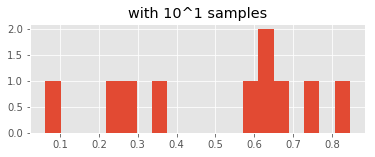

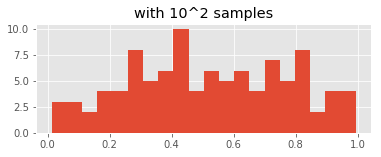

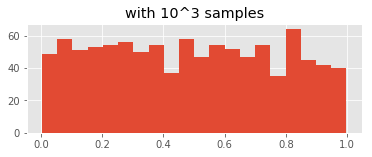

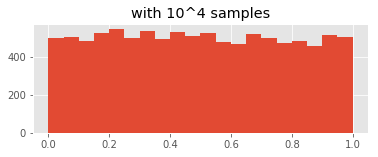

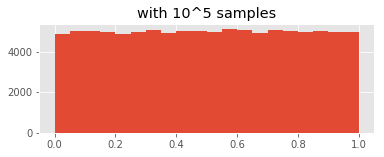

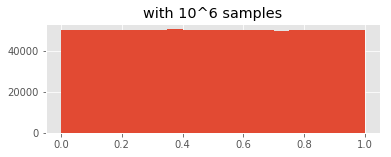

In [270]:
for i in range(1, 7):
    plt.figure(figsize=(6,2))
    plt.title("with 10^%d samples" % i)
    plt.hist(np.random.uniform(size=(10**i,)), bins=20)
    plt.show()

By the time we've generated $10^6$ samples, the histogram looks flat.

Notably, the *sum* of two dice does *not* follow a uniform distribution. The code in the following cell rolls two dice one thousand times, then counts up the most common numbers that the values of the dice add up to: 

In [276]:
rolls = [sum([random.randrange(6)+1 for j in range(2)]) for i in range(10000)]
Counter(rolls).most_common()

[(7, 1708),
 (6, 1397),
 (8, 1361),
 (9, 1095),
 (5, 1093),
 (4, 854),
 (10, 830),
 (3, 567),
 (11, 546),
 (2, 291),
 (12, 258)]

As you can see, 6, 7 and 8 are more likely than the other numbers. The following cell uses histograms to show the distribution of the sums of two uniformly distributed random numbers, drawing progressively more samples:

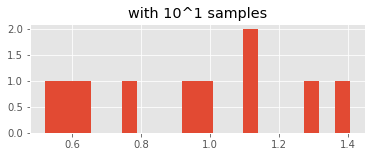

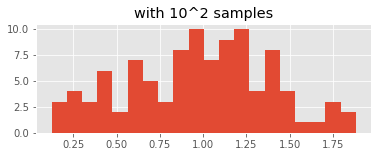

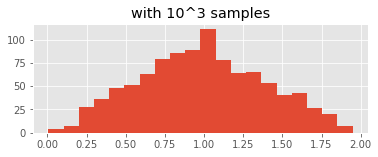

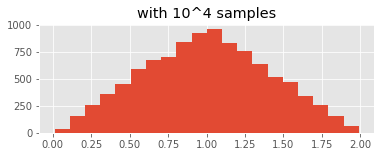

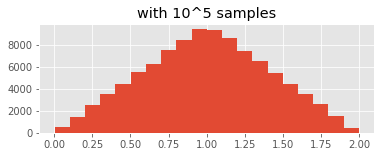

In [278]:
for i in range(1, 6):
    plt.figure(figsize=(6,2))
    plt.title("with 10^%d samples" % i)
    plt.hist(np.random.uniform(size=(10**i,)) + np.random.uniform(size=10**i,),
            bins=20)
    plt.show()

This distribution begins to resemble a pyramid, with the most likely values in the center of the range. This should be intuitive to anyone who has played a board game that uses the combined values of two dice as a gameplay mechanic. In games like this, you'll often find that dice rolls of 2 or 12 have special rules attached to them (because they're so rare).

### Normal distribution

We don't have to stop at summing the rolls of two dice. The code in the following cell sums up the values of an arbitrary number of dice with an arbitrary number of sides, and then calculates the most common outcomes for the given number of trials:

In [279]:
def get_rolls(sides, dice, trials):
    rolls = [sum([random.randrange(sides)+1 for j in range(dice)]) for i in range(trials)]
    return Counter(rolls).most_common()

So, for example, the most common sums of three six-sided dice over a few thousand rolls:

In [285]:
get_rolls(6, 3, 10000)

[(10, 1299),
 (11, 1253),
 (12, 1165),
 (9, 1154),
 (13, 973),
 (8, 942),
 (14, 689),
 (7, 686),
 (15, 475),
 (6, 455),
 (16, 284),
 (5, 280),
 (4, 139),
 (17, 129),
 (3, 47),
 (18, 30)]

Again, you'll see clustering around values that are halfway between zero and the maximum sum of the dice. The cell below defines a function that plots these values onto a histogram:

In [287]:
def plot_int_counts(counts):
    nums = np.zeros(shape=(max([item[0] for item in counts])+1,))
    for k,v in counts:
        nums[k] = v
    plt.bar(range(nums.shape[0]), nums)
    plt.show()

When you plot this histogram, you'll notice that the shape is no longer like a pyramid—instead it seems to have a bit of a curve at the top:

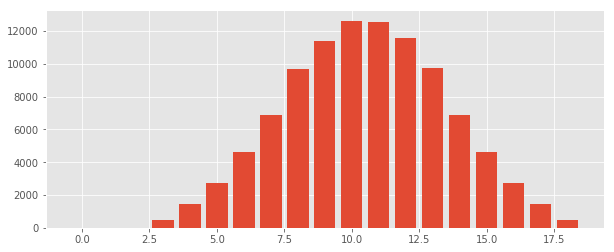

In [288]:
plot_int_counts(get_rolls(6, 3, 100000))

Plotting with even more dice gives us an even curvier curve:

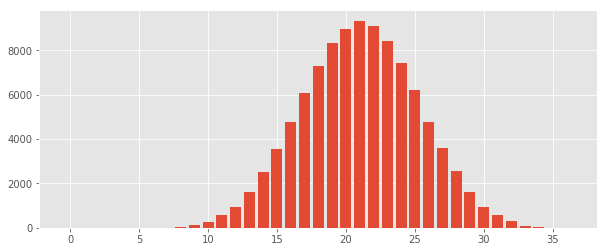

In [289]:
plot_int_counts(get_rolls(6, 6, 100000))

The sums of uniform random numbers approximate another distribution of random numbers, called *normal* (or Gaussian) distribution. Random numbers with a normal distribution cluster around a particular value (the *center* of the distribution), and that cluster has a particular density (the *variance* of the distribution).

There's a function in Python to generate normal random numbers:

In [292]:
np.random.normal(0, 1, size=24)

array([ 0.55666346,  0.78828775, -1.89242876,  1.11657664,  0.59930428,
        0.42948731,  0.06248509, -0.41520146, -0.90892362, -0.10177315,
        0.03561332, -0.86279338,  0.11413346, -0.41861412, -1.38906805,
        0.17544556,  1.22972686,  1.84462115, -0.1199184 , -0.47426685,
        1.4599421 ,  1.05031757,  0.39021285, -1.38871279])

The first parameter is the center and the second is the variance. You can switch these up:

In [293]:
np.random.normal(6, 6, size=24)

array([ 2.83742286, -3.5674987 ,  1.14996324, -0.92662108, 13.99902192,
       -3.91273991,  8.65211842, 12.62494497,  8.54856922,  4.45170762,
       11.22822557, -2.23578197,  8.27960004, 12.40225445,  9.47596415,
       14.7746359 ,  9.58724632, -2.37388089,  5.76221116, -2.33323769,
        2.10730475,  4.25036289,  6.64151889,  2.54666004])

### Graphing different kinds of random

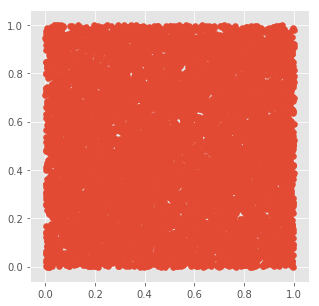

In [75]:
num_points = 10000
plt.figure(figsize=(5,5))
plt.scatter(np.random.uniform(size=(num_points,)), np.random.uniform(size=(num_points,)))
plt.show()

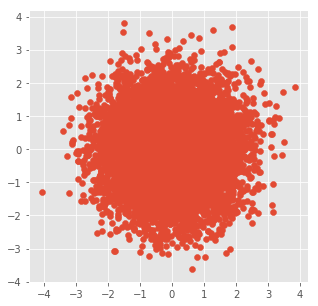

In [74]:
num_points = 10000
plt.figure(figsize=(5,5))
plt.scatter(np.random.normal(size=(num_points,)), np.random.normal(size=(num_points,)))
plt.show()

### Normal and uniform data

In [80]:
name_data = json.load(open("firstNames.json"))['firstNames']

In [81]:
name_lengths = [len(name) for name in name_data]

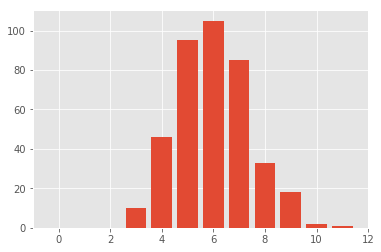

In [82]:
plot_int_counts(Counter(name_lengths).most_common())

In [59]:
words = open("frankenstein.txt").read().split()

In [60]:
word_lengths = [len(word) for word in words]

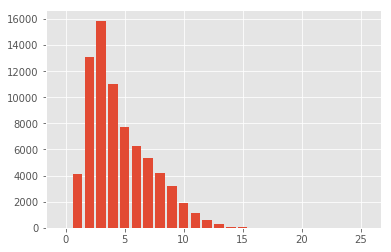

In [61]:
plot_int_counts(Counter(word_lengths).most_common())

In [62]:
word_counts = Counter(words)

In [65]:
word_counts_indexed = [(i, count) for i, (word, count) in enumerate(word_counts.most_common(250))]

### Power law distribution

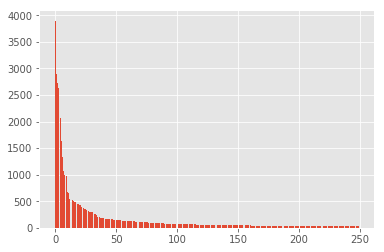

In [66]:
plot_int_counts(word_counts_indexed)

class activities: length of names, last digit of dob

In [76]:
len("AllisonParrish")

14

In [77]:
name_lengths = [
    14,
    14,
    20,
    12,
    12,
    11,
    15,
    12,
    14,
    10,
    7,
    11,
    14,
    10,
    7
]

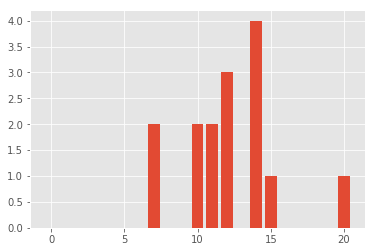

In [78]:
plot_int_counts(Counter(name_lengths).most_common())

In [83]:
digits = [
    8, 1, 8, 7, 3, 8, 4, 9, 4, 5, 0, 7, 4, 8, 8
]

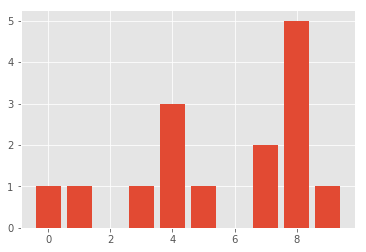

In [84]:
plot_int_counts(Counter(digits).most_common())

## Hot hand

From Gilovich, Thomas, et al. [“The Hot Hand in Basketball: On the Misperception of Random Sequences.”](https://www.sciencedirect.com/science/article/pii/0010028585900106) Cognitive Psychology, vol. 17, no. 3, 1985, pp. 311:

> [T]he tendency to perceive a sequence as streak shooting decreases with the probability of alternation. [...] The sequences selected as best examples of chance shooting had probabilities of alternation of 0.7 and 0.8 rather
than 0.5. Furthermore, the sequence with the probability of alternation of 0.5 (the proper example of chance shooting) was classified as chance shooting only by 32% of subjects, whereas 62% identified it as an example of streak shooting.

> Evidently, **people tend to perceive chance shooting as streak shooting,** and they expect sequences exemplifying chance shooting to contain many more alternations than would actually be produced by a random (chance) process. Thus, people "see" a positive serial correlation in independent sequences, and they fail to detect a negative serial correlation in alternating sequences. Hence, people not only perceive random sequences as positively correlated, they also perceive negatively correlated sequences as random.

[Interactive demo here](https://alpha.editor.p5js.org/allison.parrish/sketches/B1eFfCqal)